# Logistic Regression Full Stack
In this code page, shows how the model were trained and tested using logistic regression algorithm.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import naive_bayes, svm
from sklearn.preprocessing import LabelEncoder

Loading the dataset and split it using stratified shuffling method

In [3]:
df = pd.read_csv('d:/Mini Project/Github/Text Classification/Crime Text Classification/Data/FullTotalCleanedDatasetIndexFinal.csv')

sentences = df['text'].values
y = df['jenayah'].values

sss=StratifiedShuffleSplit(n_splits = 5, test_size=0.2, random_state=1)
sss.get_n_splits(df['text'],df['jenayah'])

for train_index, test_index in sss.split(df['text'],df['jenayah']):
      #print("TRAIN:", train_index, "TEST:", test_index)
    Train_X, Test_X = df['text'][train_index], df['text'][test_index]
    Train_Y, Test_Y = df['jenayah'][train_index],df['jenayah'][test_index]


Vectorized the splited dataset using count vectorizer

In [4]:
le = LabelEncoder()
y_train = le.fit_transform(Train_Y)
y_test = le.fit_transform(Test_Y)
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(sentences)
vectorizer.vocabulary_
vectorizer.transform(sentences).toarray()

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(Train_X)

X_train = vectorizer.transform(Train_X)
X_test  = vectorizer.transform(Test_X)
# print(vectorizer.get_feature_names())
print('done')

done


Trained the dataset, and predicted using the Logistic Regression Default Parameter (Baseline) .

In [ ]:
from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression(C= 1.0, class_weight= None, dual= False, 
                              fit_intercept= True, 
                              intercept_scaling= 1, l1_ratio= None, 
                              max_iter= 5000, multi_class= 'auto', 
                              n_jobs= None, penalty= 'l2', random_state= None, 
                              solver= 'lbfgs', 
                              tol= 0.0001, verbose= 0, warm_start= False)
Logistic.fit(X_train, y_train)
predicted = Logistic.predict(X_test)
predicted_prob = Logistic.predict_proba(X_test)

Evaluation of the algorithm using various metrics and figures

start
Accuracy: 0.9061
Recall/Sensitivity: 0.9061
Auc: 0.9949
MSE: 0.9949
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1221
           1       0.99      0.96      0.98       107
           2       0.91      0.93      0.92       137
           3       0.99      0.94      0.96        85
           4       0.91      0.90      0.90       324
           5       0.96      0.88      0.92        25
           6       0.96      0.97      0.96       362
           7       0.94      0.95      0.95       707
           8       0.97      0.86      0.91        35
           9       0.97      0.97      0.97        80
          10       1.00      0.92      0.96        24
          11       0.89      0.88      0.89       130
          12       0.55      0.27      0.36        22
          13       0.69      0.60      0.64       220
          14       0.67      0.75      0.71        60
          15       0.77      0.82      0.80       531

    ac

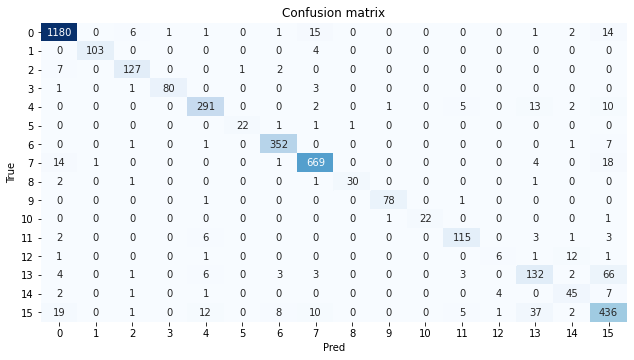

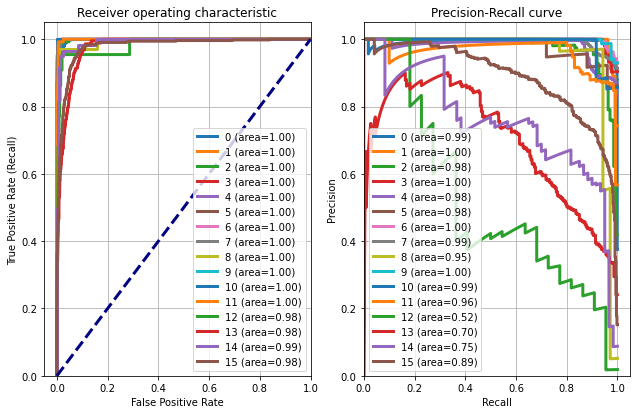

In [6]:
print('start')
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.metrics as metrics
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted)
accuracy2 = metrics.balanced_accuracy_score(y_test, predicted)
recall = metrics.recall_score(y_test, predicted,average='micro')
auc = metrics.roc_auc_score(y_test, predicted_prob, average='weighted',
                            multi_class="ovr")
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, predicted, squared=False)
print("Accuracy:",  round(accuracy,4))
print("Accuracy 2:",  round(accuracy,4))
print("Recall/Sensitivity:",round(recall,4 ))
print("Auc:", round(auc,4))
print("rate MSE:", round(auc,4))
print(metrics.classification_report(y_test, predicted))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 5.5, forward=True)
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10.5, 6.5, forward=True)

fig.savefig('e:/Notebook/MODEL/Baseline_Model/CM lr.png')
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)

    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()
fig.savefig('e:/Notebook/MODEL/Baseline_Model/ROC Precision-Recall curve baseline lr.png')

Tested on single text to check its ability to predict the crime index class from a single text


In [20]:
text='Remaja lapan belas tahun bukan sahaja menjadi mangsa rogol dan liwat oleh bapa malah tiga abang kandungnya turut laku perbuatan keji itu sejak tahun lalu penderita berakhir selepas semua suspek di cekup semalam'

string=vectorizer.transform([text])

predicted = Logistic.predict(string)
predicted_prob = Logistic.predict_proba(string)

print(predicted)
print(predicted_prob)

[7]
[[7.48796453e-05 1.58506420e-04 5.69813149e-05 1.24354503e-05
  3.58831928e-05 6.74783816e-05 1.88363698e-04 9.98936295e-01
  7.77819852e-05 1.78038037e-05 9.90659901e-06 1.62735471e-05
  3.61795752e-07 1.95839387e-04 9.30451908e-06 1.41905345e-04]]


exporting and save model for tested on public test set.

In [4]:
print('start')
import pickle
filename = 'e:/Notebook/MODEL/Baseline_Model/Baselinedlr.sav'
pickle.dump(Logistic, open(filename, 'wb'))

start


# Hypertuning logistic Regression algorithm
The Logistic Regression were tuned using regularization Strength , Penalty value and  Solver.

first section were penalty value of L1 and were run separately to due to its incompatibility with other solver causing it to run at significant low time if were run together with incompatible solver.

In [4]:
#Fine tuning Log
print('start')
import numpy as np


from sklearn.model_selection import GridSearchCV
# logistic regression
model = LogisticRegression()

param_grid={'penalty' : ['l1'],
    'C' : [0.1],
    'solver' : ['saga'],
    'max_iter' : [5000]
    }
print('defining grid')
# define grid search
grid = GridSearchCV(model, param_grid, refit = True, verbose = 3 ,cv=5,scoring='accuracy') 
# fitting the model for grid search
print('fit grid')
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


grid_predictions = grid.predict(X_test)
  
# print classification report
# print(classification_report(y_test, grid_predictions))

# print best parameter after tuning 

best_result = grid.best_score_
print(best_result)
data=pd.DataFrame(grid.cv_results_)

# data.to_csv('e:/Notebook/MODEL/Hypertune_Model/loghypertuning.csv')
data.to_csv("e:/Notebook/MODEL/Hypertune_Model/loghypertuning.csv", mode='a', header=False,index=False)

# end = time.time()
# print(f"Total runtime of the program is {end - begin}")
# modelfirstset=grid.best_estimator_
# best_result_first = grid.best_score_

start
defining grid
fit grid
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ..C=0.1, max_iter=5000, penalty=l1, solver=saga; total time=   9.1s
[CV 2/5] END ..C=0.1, max_iter=5000, penalty=l1, solver=saga; total time=  10.2s
[CV 3/5] END ..C=0.1, max_iter=5000, penalty=l1, solver=saga; total time=   9.5s
[CV 4/5] END ..C=0.1, max_iter=5000, penalty=l1, solver=saga; total time=   7.8s
[CV 5/5] END ..C=0.1, max_iter=5000, penalty=l1, solver=saga; total time=  10.6s
[CV 1/5] END C=0.1, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV 2/5] END C=0.1, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV 3/5] END C=0.1, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV 4/5] END C=0.1, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV 5/5] END C=0.1, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s


E:\Programming\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Programming\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Programming\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
E:\Programming\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Programming\envs\tf\lib\s

{'C': 0.1, 'max_iter': 5000, 'penalty': 'l1', 'solver': 'saga'}
LogisticRegression(C=0.1, max_iter=5000, penalty='l1', solver='saga')
0.9057677094773868


Second section were penalty value of l2 and were run separately to due to its incompatibility with other solver causing it to run at significant low time if were run together with incompatible solver.

In [5]:
#Fine tuning Log
from sklearn.linear_model import LogisticRegression
import numpy as np
print('start')

from sklearn.model_selection import GridSearchCV
# logistic regression
model = LogisticRegression()


# param_grid={'penalty' : ['l2'],
#     'C' : [1,0.01,0.001,10,100],
#     'solver' : ['saga','lbfgs','sag'],
#     'max_iter' : [5000]
#     }

# param_grid={'penalty' : ['l2'],
#     'C' : [1,0.01,0.001,10,100],
#     'solver' : ['lbfgs','sag'],
#     'max_iter' : [5000]
#     }

param_grid={'penalty' : ['l2'],
    'C' : [0.1],
    'solver' : ['lbfgs','sag'],
    'max_iter' : [5000]
    }
print('defining grid')
# define grid search
grid = GridSearchCV(model, param_grid, refit = True, verbose = 3 ,cv=5,scoring='accuracy') 
# fitting the model for grid search
print('fit grid')
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

modelsecondset=grid.best_estimator_
grid_predictions = grid.predict(X_test)
  
# print classification report
# print(classification_report(y_test, grid_predictions))

# print best parameter after tuning 

best_result_second = grid.best_score_
print(best_result)
data=pd.DataFrame(grid.cv_results_)


data.to_csv("e:/Notebook/MODEL/Hypertune_Model/loghypertuning.csv", mode='a', header=False,index=False)
# end = time.time()
# print(f"Total runtime of the program is {end - begin}")

start
defining grid
fit grid
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END .C=0.1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   1.3s
[CV 2/5] END .C=0.1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   1.2s
[CV 3/5] END .C=0.1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   1.3s
[CV 4/5] END .C=0.1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   1.4s
[CV 5/5] END .C=0.1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   1.3s
[CV 1/5] END ...C=0.1, max_iter=5000, penalty=l2, solver=sag; total time=   4.4s
[CV 2/5] END ...C=0.1, max_iter=5000, penalty=l2, solver=sag; total time=   4.8s
[CV 3/5] END ...C=0.1, max_iter=5000, penalty=l2, solver=sag; total time=   5.3s
[CV 4/5] END ...C=0.1, max_iter=5000, penalty=l2, solver=sag; total time=   5.0s
[CV 5/5] END ...C=0.1, max_iter=5000, penalty=l2, solver=sag; total time=   5.6s
{'C': 0.1, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression(C=0.1, max_iter=5

In [5]:
data=pd.DataFrame(grid.cv_results_)
data.to_csv("e:/Notebook/MODEL/Hypertune_Model/loghypertuning.csv", mode='a', header=False,index=False)

Both model were saved load and compared in which model produce better result

In [6]:
print('start')
import pickle
if best_result_second>best_result_first:
    filename = 'e:/Notebook/MODEL/Hypertune_Model/hyplr.sav'
    pickle.dump(modelsecondset, open(filename, 'wb'))
else:
    filename = 'e:/Notebook/MODEL/Hypertune_Model/hyplr.sav'
    pickle.dump(modelfirstset, open(filename, 'wb'))
    

start


Load the best model to be evaluated with various figure and metrics

In [4]:
import pickle
print('start')
model = pickle.load(open('e:/Notebook/MODEL/Hypertune_Model/hyplr.sav', 'rb'))

start


start
Accuracy: 0.9133
Accuracy 2: 0.9133
Recall/Sensitivity: 0.9133
Auc: 0.9953
rate MSE: 0.9953
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1221
           1       1.00      0.96      0.98       107
           2       0.94      0.93      0.93       137
           3       0.98      0.95      0.96        85
           4       0.91      0.92      0.92       324
           5       0.92      0.92      0.92        25
           6       0.96      0.98      0.97       362
           7       0.95      0.96      0.95       707
           8       1.00      0.94      0.97        35
           9       0.96      0.97      0.97        80
          10       0.92      0.92      0.92        24
          11       0.89      0.89      0.89       130
          12       0.43      0.27      0.33        22
          13       0.74      0.57      0.65       220
          14       0.68      0.75      0.71        60
          15       0.78      0.84    

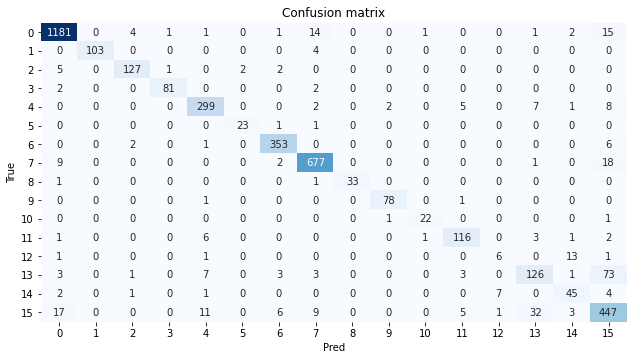

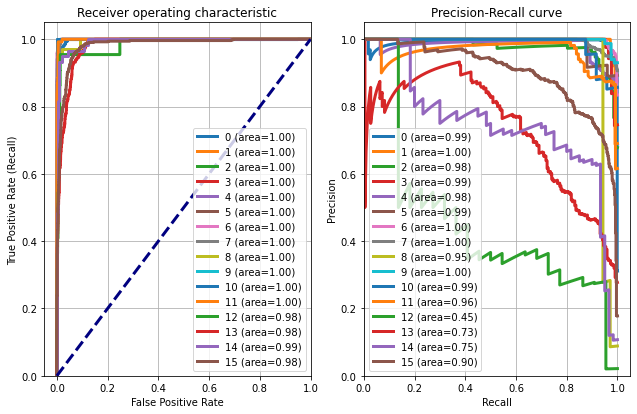

In [5]:
print('start')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

model.fit(X_train, y_train)
predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)


import sklearn.metrics as metrics
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted)
accuracy2 = metrics.balanced_accuracy_score(y_test, predicted)
recall = metrics.recall_score(y_test, predicted,average='micro')
auc = metrics.roc_auc_score(y_test, predicted_prob, average='weighted',
                            multi_class="ovr")
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, predicted, squared=False)
print("Accuracy:",  round(accuracy,4))
print("Accuracy 2:",  round(accuracy,4))
print("Recall/Sensitivity:",round(recall,4 ))
print("Auc:", round(auc,4))
print("rate MSE:", round(auc,4))
print(metrics.classification_report(y_test, predicted))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 5.5, forward=True)
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10.5, 6.5, forward=True)

fig.savefig('e:/Notebook/MODEL/Hypertune_Model/CM hyp lr.png')
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
fig.savefig('e:/Notebook/MODEL/Hypertune_Model/ROC hyp lr.png')
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()
fig.savefig('e:/Notebook/MODEL/Baseline_Model/ROC Precision-Recall curve hypertuned lr.png')

Tested on single text

In [21]:
text='Remaja lapan belas tahun bukan sahaja menjadi mangsa rogol dan liwat oleh bapa malah tiga abang kandungnya turut laku perbuatan keji itu sejak tahun lalu penderita berakhir selepas semua suspek di cekup semalam'
string=vectorizer.transform([text])

predicted = model.predict(string)
predicted_prob = model.predict_proba(string)

print(predicted)
print(predicted_prob)

[7]
[[5.46995063e-05 3.35677781e-05 9.40095606e-06 8.35163573e-06
  9.64085065e-06 6.28385174e-06 5.49875275e-05 9.99697413e-01
  2.35459786e-05 6.52342328e-06 6.17920715e-06 1.61443658e-05
  6.77948883e-07 2.64024803e-05 1.20993924e-05 3.40818409e-05]]


Bit analysis on the influence of L1 and L2

In [7]:
from sklearn.linear_model import LogisticRegression
LogisticL2 = LogisticRegression(C= 1, class_weight= None, dual= False, fit_intercept= True, intercept_scaling= 1, l1_ratio= None, max_iter= 5000, multi_class= 'auto', n_jobs= None, penalty= 'l2', random_state= None, solver= 'saga', tol= 0.0001, verbose= 0, warm_start= False)
LogisticL2.fit(X_train, y_train)
predicted = LogisticL2.predict(X_test)
predicted_prob = LogisticL2.predict_proba(X_test)
print('Non Zero weights for L2',np.count_nonzero(LogisticL2.coef_))

Non Zero weights for L2 115584


In [8]:
LogisticL1 = LogisticRegression(C= 1, class_weight= None, dual= False, fit_intercept= True, intercept_scaling= 1, l1_ratio= None, max_iter= 5000, multi_class= 'auto', n_jobs= None, penalty= 'l1', random_state= None, solver= 'saga', tol= 0.0001, verbose= 0, warm_start= False)
LogisticL1.fit(X_train, y_train)
predicted = LogisticL1.predict(X_test)
predicted_prob = LogisticL1.predict_proba(X_test)
print('Non Zero weights for L1 ',np.count_nonzero(LogisticL1.coef_))

Non Zero weights for L1  1136


Confirming the calculation of metrics based on confusion matrix value

In [7]:
confusion_matrix=cm

FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)

FP=np.array(FP).tolist()
FP=sum(FP)
FN=np.array(FN).tolist()
FN=sum(FN)
TP=np.array(TP).tolist()
TP=sum(TP)



TN = confusion_matrix.sum() - (FP + FN + TP)
TN = -(confusion_matrix.sum() - (FP + FN + TP))
print(TN)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

#f1 score

F1score=TP/(TP+(1/2*(FP+FN)))
print('Accuracy:',ACC)
print('Sensitivity Rate:',TPR)
print('Specificity:',TPR)
print('Precision:',PPV)
print('F1 Score:',F1score)

# print(type(FP))
# fp=np.array(FP).tolist()
# print(fp.sum)

# print(confusion_matrix.sum())
# # print(TPR)
recall = metrics.recall_score(y_test, predicted,average='micro')
f1score = metrics.f1_score(y_test, predicted,average='micro')
# print('f1:',recall)
# print('fn:',FN)
# print('fp:',FP)
# print('tp:',TP)
# print('TN:',TN)

print('f1score:',f1score)


# fm=   TP/(TP+(1/2*(FP+FN)))

# print('f1:',fm)
# print('f1:',fm)

353
Accuracy: 0.852177554438861
Sensitivity Rate: 0.9132678132678133
Specificity: 0.9132678132678133
Precision: 0.9132678132678133
F1 Score: 0.9132678132678133
f1score: 0.9132678132678134
